In [46]:
import sys

setupFlag = False ## Set flag to True if these aren't installed
if setupFlag:
    !{sys.executable} -m pip install astroquery
    ## https://github.com/astropy/astroquery
    !{sys.executable} -m pip install eleanor
    ## https://github.com/afeinstein20/eleanor
    !{sys.executable} -m pip install lightkurve
    ## https://github.com/KeplerGO/lightkurve
    !{sys.executable} -m pip install sncosmo

In [47]:
from useful_functions import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

savePNG = True ## Changes matplotlib backend to save plots as pgf (default:True)
if savePNG:
    mpl.use("agg")
    plotExt = str('.png')
elif not savePNG:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,})
    plotExt = str('.pgf')

notebookPlotFlag = True ## Changes Jupyter plotting backend (default:True)
if notebookPlotFlag:
    %matplotlib notebook
elif not notebookPlotFlag:
    %matplotlib inline

In [48]:
sn2020bpi_s21_dir = './Fausnaugh/sector21/cam3_ccd2/lc/lc_2020bpi_cleaned'
sn2020bpi_s21 = lcImport(sn2020bpi_s21_dir)
sn2020bpi_s21['cts_median'] = sn2020bpi_s21['cts'].rolling(24).median()
sn2020bpi_s21['e_cts_median'] = sn2020bpi_s21['e_cts'].rolling(24).median()
sn2020bpi_s21['mjd'] = Time(sn2020bpi_s21['BTJD']+2457000.0, format='jd').mjd

sn2020bpi_s22_dir = './Fausnaugh/sector22/cam3_ccd1/lc/lc_2020bpi_cleaned'
sn2020bpi_s22 = lcImport(sn2020bpi_s22_dir)
sn2020bpi_s22['cts_median'] = sn2020bpi_s22['cts'].rolling(24).median()
sn2020bpi_s22['e_cts_median'] = sn2020bpi_s22['e_cts'].rolling(24).median()
sn2020bpi_s22['mjd'] = Time(sn2020bpi_s22['BTJD']+2457000.0, format='jd').mjd

sn2020bpi_s22_fix = (1912,1914.5)
sn2020bpi_s22_fixed = sn2020bpi_s22.query('BTJD > 1900')
sn2020bpi_s22_fixed = sn2020bpi_s22_fixed[(sn2020bpi_s22_fixed['BTJD'] < sn2020bpi_s22_fix[0]) | (sn2020bpi_s22_fixed['BTJD'] > sn2020bpi_s22_fix[1])]


sn2020bpi_s21s22 = pd.concat([sn2020bpi_s21,sn2020bpi_s22_fixed])
sn2020bpi_s21s22['cts_bkg_model_sub'] = sn2020bpi_s21s22['cts'] - sn2020bpi_s21s22['bkg_model']

In [49]:
sn2020bpi_peak_iso = Time('2020-02-14', format='iso')
sn2020bpi_peak_btjd = sn2020bpi_peak_iso.jd - 2457000.0

In [50]:
ax = sn2020bpi_s21.plot(x='BTJD', y='cts', yerr='e_cts',
                      color='blue', alpha=0.1, kind='scatter', label='Fausnaugh Corrected Counts')
sn2020bpi_s21.plot(x='BTJD', y='cts_median',
                color='blue',kind='scatter',ax=ax, label='Rolling Median')
plt.axvline(x=sn2020bpi_peak_btjd, color=(0.8,0.4,0), 
            linestyle='dashed', label='Estimated Peak')
plt.axvspan(sn2020bpi_s21['BTJD'][sn2020bpi_s21['BTJD'].diff().argmax()-1],
           sn2020bpi_s21['BTJD'][sn2020bpi_s21['BTJD'].diff().argmax()],
           facecolor='black',alpha=0.2)
plt.legend()
plt.title('sn2020bpi (sector21, cam3_ccd2)')
plt.show()
#display_side_by_side(sn2020bpi_s21)

<IPython.core.display.Javascript object>

In [51]:
ax = sn2020bpi_s22_fixed.plot(x='BTJD', y='cts', yerr='e_cts',
                      color='blue', alpha=0.1, kind='scatter', label='Fausnaugh Corrected Counts')
sn2020bpi_s22_fixed.plot(x='BTJD', y='cts_median',
                color='blue',kind='scatter',ax=ax, label='Rolling Median')
plt.axvspan(sn2020bpi_s22['BTJD'][sn2020bpi_s22['BTJD'].diff().argmax()-1],
           sn2020bpi_s22['BTJD'][sn2020bpi_s22['BTJD'].diff().argmax()],
           facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s22_fix[0], ##See why this is needed at some point
           sn2020bpi_s22_fix[1],
           facecolor='black',alpha=0.2)
plt.legend()
plt.title('sn2020bpi (sector22, cam3_ccd1)')
plt.show()
#plt.savefig('sn2020bpi_s22_fixed.png')

<IPython.core.display.Javascript object>

In [52]:
# sn2020bpi_s22_fixed['BTJD'][sn2020bpi_s22_fixed['BTJD'].diff().argmax()+1]
# #display_side_by_side(pd.DataFrame(sn2020bpi_s22_fixed['BTJD'].diff()).sort_values(by='BTJD',ascending=False))
# sn2020bpi_s22_fixed['BTJD'][sn2020bpi_s22_fixed['BTJD'].diff().idxmax()]
# # display_side_by_side(sn2020bpi_s22_fixed)

In [53]:
# peak_cts = (sn2020bpi_s21.query('BTJD > 1892 & BTJD < 1894')['cts']).median()
# sn2020bpi_s22_fixed = sn2020bpi_s22[sn2020bpi_s22.cts <= 0.75*peak_cts]

In [54]:
ax = sn2020bpi_s21s22.plot(x='BTJD', y='cts', yerr='e_cts',
                      color='blue', alpha=0.05, kind='scatter', label='Fausnaugh Corrected Counts')
sn2020bpi_s21s22.plot(x='BTJD', y='cts_median',
                color='blue',kind='scatter',ax=ax, label='Rolling Median')
plt.axvline(x=sn2020bpi_peak_btjd, color=(0.8,0.4,0), 
            linestyle='dashed', label='Estimated Peak')
plt.axvspan(sn2020bpi_s21['BTJD'][sn2020bpi_s21['BTJD'].diff().argmax()-1],
           sn2020bpi_s21['BTJD'][sn2020bpi_s21['BTJD'].diff().argmax()],
           facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s22['BTJD'][sn2020bpi_s22['BTJD'].diff().argmax()-1],
           sn2020bpi_s22['BTJD'][sn2020bpi_s22['BTJD'].diff().argmax()],
           facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s22_fix[0],
           sn2020bpi_s22_fix[1],
           facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s21['BTJD'].iloc[-1],
           sn2020bpi_s22['BTJD'].iloc[0],
           facecolor='black',alpha=0.2)
plt.axvspan(sn2020bpi_s21['BTJD'].iloc[-1],
           sn2020bpi_s22_fixed['BTJD'].iloc[0],
           facecolor='black',alpha=0.2)
plt.legend()
plt.title('sn2020bpi (Sector 21 & Sector 22)')
plt.show

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(*args, **kw)>

In [55]:
# pfit = np.polynomial.polynomial.Polynomial.fit(x=(sn2020bpi_s21s22.query('BTJD > 1875 & BTJD < 1885')['BTJD']-1875),
#                                                y=sn2020bpi_s21s22.query('BTJD > 1875 & BTJD < 1885')['cts'],
#                                                deg=2)
# curve_fit = pd.DataFrame(data={'BTJD':[sn2020bpi_s21s22.query('BTJD > 1875 & BTJD < 1885')['BTJD']],
#                     'cts':[pfit(sn2020bpi_s21s22.query('BTJD > 1875 & BTJD < 1885')['BTJD'])]})


ax = sn2020bpi_s21s22.plot(x='BTJD', y='cts', yerr='e_cts',
                      color='blue', alpha=0.05, kind='scatter', label='Fausnaugh Corrected Counts')
ax.set_ylim(sn2020bpi_s21s22['cts'].min()*1.1,sn2020bpi_s21s22['cts'].max()*1.1)
# curve_fit.plot(x='BTJD', y='cts',
#                color='orange',kind='line',label=np.str('polyfit ('+np.str(pfit)+')'))
# ax.plot(sn2020bpi_s21s22.query('BTJD > 1875 & BTJD < 1885')['BTJD'], 
#          pfit((sn2020bpi_s21s22.query('BTJD > 1875 & BTJD < 1885')['BTJD']-1875)),
#         color='orange')
sn2020bpi_s21s22.plot(x='BTJD', y='bkg_model', 
                      color='purple', alpha=0.2, kind='scatter', label='bkg_model',ax=ax)
sn2020bpi_s21s22.plot(x='BTJD', y='bkg',
                      color='green', alpha=0.2, kind='scatter', label='bkg',ax=ax)


<IPython.core.display.Javascript object>

In [56]:
# display_side_by_side( sn2020bpi_s21s22)

sn2020bpi_s21s22.plot('BTJD','e_cts',kind='scatter')

<IPython.core.display.Javascript object>

In [57]:
# ax = sn2020bpi_s21s22.plot(x='BTJD', y='bkg', 
#                       color='blue', alpha=0.05, kind='scatter',s=10,label='bkg')
fig,ax = plt.subplots(1,1)
#ax.set_yscale('symlog')
ax.scatter(sn2020bpi_s21s22['BTJD'], sn2020bpi_s21s22['bkg2'].rolling(96).median(),color='red',s=10,alpha=0.05,label='bkg2')
ax.scatter(sn2020bpi_s21s22['BTJD'], sn2020bpi_s21s22['bkg_model'].rolling(96).median(),color='green',s=10,alpha=0.05,label='bkg_model')
ax.scatter(sn2020bpi_s21s22['BTJD'], sn2020bpi_s21s22['cts'].rolling(96).median(),color='orange',s=10,alpha=0.2,label='cts')
plt.legend()

<IPython.core.display.Javascript object>

In [58]:
fig,ax = plt.subplots(1,1)
#ax.set_yscale('symlog')
ax.scatter(sn2020bpi_s21s22['BTJD'], sn2020bpi_s21s22['cts'].rolling(96).median(),color='red',s=10,alpha=0.5,label='cts')
ax.scatter(sn2020bpi_s21s22['BTJD'], sn2020bpi_s21s22['bkg'].rolling(96).median(),color='green',s=10,alpha=0.5,label='bkg')
ax.scatter(sn2020bpi_s21s22['BTJD'], (sn2020bpi_s21s22['cts']+sn2020bpi_s21s22['bkg']).rolling(96).median(),color='purple',s=10,alpha=0.5,label='cts+bkg')
plt.legend()

## small negative bump in bkg at 1917 seems irregular, other cycles have fairly smooth curves for the bkg as time
## since start of cycle increases. Wouldn't this mean the bump should actually be larger than it is?

<IPython.core.display.Javascript object>

In [59]:
fig,ax = plt.subplots(1,1)


ax.scatter(sn2020bpi_s21s22['BTJD'],
       sn2020bpi_s21s22['cts'].rolling(96).median(),
          color='orange',alpha=0.05,s=10,label='cts')

ax.scatter(sn2020bpi_s21s22['BTJD'],
       (sn2020bpi_s21s22['bkg_model']).rolling(96).median(),
          color='red',alpha=0.05,s=10,label='bkg_model')

ax.scatter(sn2020bpi_s21s22['BTJD'],
       (sn2020bpi_s21s22['bkg2']).rolling(96).median(),
          color='blue',alpha=0.02,s=10,label='bkg2')

ax.scatter(sn2020bpi_s21s22['BTJD'],
       (sn2020bpi_s21s22['cts']-sn2020bpi_s21s22['bkg_model']).rolling(96).median(),
          color='green',alpha=0.05,s=10,label='cts-bkg_model')


divider = make_axes_locatable(ax)
ax2 = divider.append_axes("bottom",size="25%",pad=0.03)
ax.figure.add_axes(ax2)
ax2.plot(sn2020bpi_s21s22['BTJD'],
        (sn2020bpi_s21s22['bkg_model']-sn2020bpi_s21s22['bkg2']).rolling(96).median(),
         color='grey',label='bkg_model-bkg2')
ax.grid()
ax2.grid()

## Trying to color legend with full transparency, having issues 
# ax = plt.gca()
# leg = fig.get_legend()
# leg.legendHandles[0].set_color('red')
fig.legend()
ax2.set_xlabel('BTJD')
ax.set_ylabel('cts')


<IPython.core.display.Javascript object>

Text(0, 0.5, 'cts')

In [60]:
def cts_sub_bkg_pen(params,subItem):
    return (sn2020bpi_s21s22['cts']-(params[0]*sn2020bpi_s21s22[np.str(subItem)]+params[1])
            /sn2020bpi_s21s22['e_cts'])
## Getting weird error: "TypeError: cts_sub_bkg_pen() takes 2 positional arguments but 10 were given"
# cts_bkg_scale_params = optimize.least_squares(cts_sub_bkg_pen,x0=[10,1000],args=('bkg_model'))

In [61]:
ab = sncosmo.get_magsystem('ab')
tess_response = pd.read_csv('./tess_response_curve.csv',header=0,names=['wl_nm','trans'])
tess_response['wl_ang'] = (np.array(tess_response['wl_nm']) * u.nm).to_value('angstrom')

atlaso_response = pd.read_csv('./atlas_o.csv',header=0,names=['wl_ang','trans'])


sn2020bpi_ztf = pd.read_csv('./sn2020bpi_ztf.csv',header=0)
sn2020bpi_ztf['BTJD'] = Time(sn2020bpi_ztf['mjd'],format='mjd').jd - 2457000.0
sn2020bpi_ztf['magap_rolling'] = sn2020bpi_ztf['magap'].rolling(12).median()
sn2020bpi_ztf['flux'] = [ab.band_mag_to_flux(sn2020bpi_ztf['magap'][i], 'ztfr') for i in range(len(sn2020bpi_ztf['magap']))]
sn2020bpi_ztf['flux_rolling'] = sn2020bpi_ztf['flux'].rolling(12).median()
#sn2020bpi_ztf['sig_flux'] = [ab.band_mag_to_flux(sn2020bpi_ztf['sigmagap'][i], 'ztfr') for i in range(len(sn2020bpi_ztf['sigmagap']))]
## Sig Flux is wrong
sn2020bpi_atlas = pd.read_csv('./sn2020bpi_atlas.csv',header=0)
sn2020bpi_atlas.replace(to_replace='orange-ATLAS',value='orange',inplace=True) ## covers 560-820 nm (closest to tess)
sn2020bpi_atlas.replace(to_replace='cyan-ATLAS',value='cyan',inplace=True) ## covers 420-650 nm
atlas_o = sn2020bpi_atlas[sn2020bpi_atlas.FLT == 'orange']
#sn2020bpi_atlas
# sn2020bpi_ztf

In [62]:
tess_band = sncosmo.Bandpass(tess_response['wl_ang'],tess_response['trans'],name='tess')
sncosmo.register(tess_band,force=True)

atlaso_band = sncosmo.Bandpass(atlaso_response['wl_ang'],atlaso_response['trans'],name='atlaso')
sncosmo.register(atlaso_band,force=True)

In [63]:
ax = sn2020bpi_ztf.query('fid == 2').plot(x='BTJD',y='magap', ylim=(22,16), kind='scatter',alpha=1)
plt.axvline(x= sn2020bpi_s21s22['BTJD'].min(), color='black',alpha=0.5)
plt.axvline(x= sn2020bpi_s21s22['BTJD'].max(), color='black',alpha=0.5)
plt.axvline(x=sn2020bpi_peak_btjd, color=(0.8,0.4,0), 
            linestyle='dashed', label='Estimated Peak')
plt.axvline(x=1917, color=(0.8,0.4,0), 
            linestyle='dashed', label='Weird Bump')

# temp = sn2020bpi_ztf.query('fid == 1').plot(x='BTJD',y='magap_rolling', ylim=(22,16), kind='scatter',ax=ax)
plt.ylabel('magap')
plt.title('ZTF Lightcurve')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'ZTF Lightcurve')

In [64]:
tess_interval = (((sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['BTJD'].max() - sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['BTJD'].min())/len(sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['BTJD']))*u.d).to_value('s')
tess_area = np.pi * 5.25**2 ## unsure about correct value, doesn't necessarily matter
#tess_zeroed_counts = sn2020bpi_s21s22['cts']#+abs(sn2020bpi_s21s22['cts'].min())+1e-53
tess_flux = np.array(sn2020bpi_s21s22['cts'] / tess_interval / tess_area)
tess_flux_error = np.array(sn2020bpi_s21s22['e_cts'] / tess_interval / tess_area)
sn2020bpi_s21s22['flux'] = tess_flux
sn2020bpi_s21s22['flux_error'] = tess_flux_error
sn2020bpi_s21s22['bkg_model_flux'] = np.array(sn2020bpi_s21s22['bkg_model'] / tess_interval / tess_area)
sn2020bpi_s21s22['flux_bkg_model_sub'] = sn2020bpi_s21s22['flux'] - sn2020bpi_s21s22['bkg_model_flux']
#np.array(sn2020bpi_s21s22['cts_bkg_model_sub'] / tess_interval / tess_area)
#display_side_by_side(sn2020bpi_s21s22)

In [65]:
tess_interval

2010.8435197341128

In [66]:
ax = sn2020bpi_ztf.query('fid ==2').plot(x='BTJD',y='flux', 
                        xlim=(sn2020bpi_s21s22['BTJD'].min(), sn2020bpi_s21s22['BTJD'].max()), 
                        kind='scatter',label='ZTF')
#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
sn2020bpi_s21s22.plot(x='BTJD',y='flux', 
                        xlim=(sn2020bpi_s21s22['BTJD'].min(), sn2020bpi_s21s22['BTJD'].max()), 
                        color='red',alpha=0.1,kind='scatter',label='TESS',ax=ax)

#sn2020bpi_ztf.plot(x='BTJD',y='flux_rolling',  kind='scatter',ax=ax)

<IPython.core.display.Javascript object>

In [67]:
# sn2020bpi_s21s22['mag'] = [ab.band_flux_to_mag(tess_flux[i], 'tess') for i in range(len(tess_flux))]
# sn2020bpi_s21s22['mag_rolling'] = sn2020bpi_s21s22['mag'].rolling(24).median()

In [68]:
# ax = sn2020bpi_ztf.query('fid==2').plot(x='BTJD',y='magap', 
#                         xlim=(sn2020bpi_s21s22['BTJD'].min(), sn2020bpi_s21s22['BTJD'].max()), ylim=(22,16), 
#                         kind='scatter',alpha=0.3,label='ZTF')
# # plt.axvline(x= sn2020bpi_s21s22['BTJD'].min(), color='black',alpha=0.5)
# # plt.axvline(x= sn2020bpi_s21s22['BTJD'].max(), color='black',alpha=0.5)
# plt.axvline(x=sn2020bpi_peak_btjd, color=(0.8,0.4,0), 
#             linestyle='dashed', label='Estimated Peak')
# # plt.axvline(x=1917, color=(0.8,0.4,0), 
# #             linestyle='dashed', label='Weird Bump')

# #sn2020bpi_ztf.plot(x='BTJD',y='magap_rolling', ylim=(22,16), kind='scatter',ax=ax)
# sn2020bpi_s21s22.plot(x='BTJD',y='mag',color='red',alpha=0.1,kind='scatter',ax=ax,label='Fausnaugh')
# sn2020bpi_s21s22.plot(x='BTJD',y='mag_rolling',color='red',kind='scatter',ax=ax)
# plt.legend()
# plt.ylabel('magap')
# plt.title('ZTF Lightcurve')

In [69]:
def interp_mjd(data,argData,data_index='time',arg_index='time'):
    ## More generalized version of interpToMatch(). Takes an argument for a reference
    ## DataFrame and a variable number of DataFrames to be interpolated so that
    ## they match the time sampling of the reference DataFrame. Like interpToMatch(),
    ## DataFrames must have a 'time' column of an integer or float type.
    ## Function returns an array containing the reference DataFrame as the first
    ## item followed by the interpolated DataFrames in the order in which they were
    ## passed to the function
    interpArray = []
    interpArray.append(data)
    
    data_indexed = data.set_index(str(data_index))
    data_length = len(data_indexed.index)
    minun = data_indexed.index.min()
    plusle = data_indexed.index.max()
    newIndex = data_indexed.index
    
    arg_indexed = argData.set_index(str(arg_index))
    arg_interp = pd.DataFrame(index=newIndex)
    arg_interp.index.name = arg_indexed.index.name
    for colname, col in arg_indexed.iteritems():
        arg_interp[colname] = np.interp(newIndex,arg_indexed.index,col)
    arg_interp.reset_index(inplace=True)
    return arg_interp

In [70]:
tess_start_mjd = sn2020bpi_s21s22['mjd'].min()
tess_end_mjd = sn2020bpi_s21s22['mjd'].max()
sn2020bpi_ztf_r = sn2020bpi_ztf.query('fid == 2 & mjd > @tess_start_mjd & mjd < @tess_end_mjd').reset_index()
sn2020bpi_s21s22_even = sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]
sn2020bpi_s21s22_odd = sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 ==0]
sn2020bpi_s21s22_interpolated = interp_mjd(data=sn2020bpi_ztf_r,
                                            argData=sn2020bpi_s21s22_even,data_index='mjd', arg_index='mjd')
# sn2020bpi_s21s22_interpolated
# sn2020bpi_ztf_limited

In [71]:
# ##generalize so you can also fit using flux_bkg_sub ##Update: did it

# def sn2020bpi_flux_scale(params,timeMin=0,timeMax=0):
#     if timeMin !=0 and timeMax !=0:
#         return (sn2020bpi_ztf_r[(sn2020bpi_ztf_r.BTJD > timeMin) & (sn2020bpi_ztf_r.BTJD <timeMax)]['flux'] - 
#                 (params[0]*sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD > timeMin) & 
#                                                          (sn2020bpi_ztf_r.BTJD <timeMax)]['flux'] + params[1]))
#     elif timeMin ==0 and timeMax ==0:
#         return ((sn2020bpi_ztf_r['flux']) - 
#                 (params[0]*sn2020bpi_s21s22_interpolated['flux']+ params[1]))

# fluxOptParams = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05])
# fluxOptParamsSoft = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],loss='soft_l1')
# fluxOptParams_s21 = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
#                                        args=(sn2020bpi_s21s22_interpolated['BTJD'].min(),
#                                              sn2020bpi_s22_fixed['BTJD'].min()))
# fluxOptParams_s21a = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
#                                        args=(sn2020bpi_s21s22_interpolated['BTJD'].min(),
#                                              1884))
# fluxOptParams_s21b = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
#                                        args=(sn2020bpi_s22_fixed['BTJD'].min(),
#                                              1884))
# fluxOptParams_s22 = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
#                                        args=(sn2020bpi_s22_fixed['BTJD'].min(),1912))
# print(fluxOptParams_s21.x, fluxOptParams_s22.x)
# sn2020bpi_s21s22_interpolated['mjd'].min()

In [72]:
def sn2020bpi_flux_scale(params, fluxType, timeMin=0,timeMax=0):
    if timeMin !=0 and timeMax !=0:
        return (sn2020bpi_ztf_r[(sn2020bpi_ztf_r.BTJD > timeMin) & (sn2020bpi_ztf_r.BTJD <timeMax)][np.str('flux')] - 
                (params[0]*sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD > timeMin) & 
                                                         (sn2020bpi_ztf_r.BTJD <timeMax)][np.str(fluxType)] + params[1]))
    elif timeMin ==0 and timeMax ==0:
        return ((sn2020bpi_ztf_r[np.str('flux')]) - 
                (params[0]*sn2020bpi_s21s22_interpolated[np.str(fluxType)]+ params[1]))
    
fluxOptParams = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],args=('flux',0,0))
fluxOptParams_s21 = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux',
                                             sn2020bpi_s21s22_interpolated['BTJD'].min(),
                                             sn2020bpi_s22_fixed['BTJD'].min()))
fluxOptParams_s21a = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux',
                                             sn2020bpi_s21s22_interpolated['BTJD'].min(),
                                             1884))
fluxOptParams_s21b = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux',
                                             sn2020bpi_s22_fixed['BTJD'].min(),
                                             1884))
fluxOptParams_s22 = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux',
                                             sn2020bpi_s22_fixed['BTJD'].min(),
                                             1912))

fluxOptParams_bkg_s21 = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux_bkg_model_sub',
                                             sn2020bpi_s21s22_interpolated['BTJD'].min(),
                                             sn2020bpi_s22_fixed['BTJD'].min()))
fluxOptParams_bkg_s22 = optimize.least_squares(sn2020bpi_flux_scale, x0=[0.3,.05],
                                       args=('flux_bkg_model_sub',
                                             sn2020bpi_s22_fixed['BTJD'].min(),
                                             1912))

In [73]:
sn2020bpi_s21s22_interpolated['flux_error']

0     0.005799
1     0.006030
2     0.005996
3     0.005841
4     0.005953
        ...   
60    0.007975
61    0.008513
62    0.008284
63    0.007482
64    0.007123
Name: flux_error, Length: 65, dtype: float64

In [74]:
sn2020bpi_tess_flux_fit = pd.DataFrame()
sn2020bpi_tess_flux_fit['mjd'] = sn2020bpi_s21s22_interpolated['mjd']
sn2020bpi_tess_flux_fit['flux'] = fluxOptParams.x[0]*sn2020bpi_s21s22_interpolated['flux'] + fluxOptParams.x[1]
sn2020bpi_tess_flux_2fit_s21 =pd.Series(fluxOptParams_s21.x[0]*
                                        sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD<1900)]['flux']+
                                        fluxOptParams_s21.x[1])
sn2020bpi_tess_flux_2fit_s22 =pd.Series(fluxOptParams_s22.x[0]*
                                        sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD>1900)]['flux']+
                                        fluxOptParams_s22.x[1])

sn2020bpi_tess_flux_3fit_s21a =pd.Series(fluxOptParams_s21.x[0]*
                                        sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD<1885)]['flux']+
                                        fluxOptParams_s21.x[1])
sn2020bpi_tess_flux_3fit_s21b =pd.Series(fluxOptParams_s21.x[0]*
                                        sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD>1885) & (sn2020bpi_ztf_r.BTJD<1900)]['flux']+
                                        fluxOptParams_s21.x[1])

sn2020bpi_tess_flux_fit['flux_2fit'] = pd.concat([sn2020bpi_tess_flux_2fit_s21,sn2020bpi_tess_flux_2fit_s22],
                                                ignore_index=True)
sn2020bpi_tess_flux_fit['flux_3fit'] = pd.concat([sn2020bpi_tess_flux_3fit_s21a,sn2020bpi_tess_flux_3fit_s21b,sn2020bpi_tess_flux_2fit_s22],
                                                ignore_index=True)
#tess_flux_fit['flux'] = 0.22*sn2020bpi_s21s22_interpolated['flux'] + 0.0545

# plt.plot(sn2020bpi_s21s22_interpolated['mjd'], 
#          fluxOptParams.x[0]*sn2020bpi_s21s22_interpolated['flux'] + fluxOptParams.x[1],
#         color='green')
# plt.plot(sn2020bpi_s21s22_interpolated['mjd'], 
#          fluxOptParamsSoft.x[0]*sn2020bpi_s21s22_interpolated['flux'] + fluxOptParamsSoft.x[1],
#         color='purple')
# plt.show()
#sn2020bpi_ztf_r
#sn2020bpi_tess_flux_fit['flux']-sn2020bpi_tess_flux_fit['flux_2fit']

In [75]:
def quadrat(x,a,b,c):
    return a*(x**2) + b*x + c

sn2020bpi_ztf_r_curve_params, sn2020bpi_ztf_r_curve_cov= optimize.curve_fit(quadrat,
                                              (sn2020bpi_ztf_r['mjd']-sn2020bpi_ztf_r['mjd'].min()),
                                              sn2020bpi_ztf_r['flux'])

sn2020bpi_ztf_r['curvefit'] = quadrat((sn2020bpi_ztf_r['mjd']-sn2020bpi_ztf_r['mjd'].min()), 
                                      sn2020bpi_ztf_r_curve_params[0], 
                                      sn2020bpi_ztf_r_curve_params[1], 
                                      sn2020bpi_ztf_r_curve_params[2])

In [76]:
sn2020bpi_tess_flux_fit_curve_params, sn2020bpi_flux_fit_curve_cov = optimize.curve_fit(quadrat,
                                                  (sn2020bpi_tess_flux_fit['mjd']-sn2020bpi_tess_flux_fit['mjd'].min()),
                                                  sn2020bpi_tess_flux_fit['flux'])
sn2020bpi_tess_flux_fit['curvefit'] = quadrat((sn2020bpi_tess_flux_fit['mjd']-sn2020bpi_tess_flux_fit['mjd'].min()), 
                                      sn2020bpi_tess_flux_fit_curve_params[0], 
                                      sn2020bpi_tess_flux_fit_curve_params[1], 
                                      sn2020bpi_tess_flux_fit_curve_params[2])

ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux', 
                          ylim=(0,0.13),kind='scatter',s=10,color='navy', alpha=0.95,
                          label='ZTF')

sn2020bpi_ztf_r.plot(x='mjd',y='curvefit', kind='line',color='navy',alpha=0.1,label='_nolegend_',ax=ax)
# ax.axvline(x=sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['curvefit'].argmax()], color='blue', 
#             linestyle='dashed', alpha=0.1,label='_nolegend_')

sn2020bpi_tess_flux_fit.plot(x='mjd',y='flux',  
                        kind='scatter',s=10,color='violet',alpha=0.95,
                             label='TESS',ax=ax)
sn2020bpi_tess_flux_fit.plot(x='mjd',y='curvefit', kind='line',color='violet',alpha=0.2,label='_nolegend_',ax=ax)
# ax.axvline(x=sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['curvefit'].argmax()], color='red', 
#             linestyle='dashed', alpha=0.1,label='_nolegend_')

divider = make_axes_locatable(ax)

ax2 = divider.append_axes("bottom",size="25%",pad=0.03)
ax.figure.add_axes(ax2)
ax2.plot(sn2020bpi_tess_flux_fit['mjd'],
        sn2020bpi_ztf_r['flux']-sn2020bpi_tess_flux_fit['flux'],color='grey')
ax2.grid()
plt.xlabel("mjd")
anchText1 = mpl.offsetbox.AnchoredText('TESS Scale Factor: '+np.str(np.around(fluxOptParams.x[0],3))+
         '\n'+'TESS Vertical Shift: '+np.str(np.around(fluxOptParams.x[1],3)),loc=4)
ax.add_artist(anchText1)
ax.legend(loc=2)

#plt.savefig(fname='ZTF_TESS_Flux_Interpolation_Scaling(NoCurve)300.png',dpi=300)

print(sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['curvefit'].argmax()],
sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['curvefit'].argmax()],
     sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['curvefit'].argmax()]-
sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['curvefit'].argmax()])
print(sn2020bpi_ztf_r['flux'].max(),
     sn2020bpi_tess_flux_fit['flux'].max(),
     sn2020bpi_ztf_r['flux'].max()-
     sn2020bpi_tess_flux_fit['flux'].max())
print(sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['flux'].argmax()],
     sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['flux'].argmax()],
     sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['flux'].argmax()]-
     sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['flux'].argmax()])

<IPython.core.display.Javascript object>

58899.3483564998 58898.364583300005 0.9837731997977244
0.09896918552955393 0.07692480537548088 0.02204438015407305
58898.364583300005 58899.4774074 -1.112824099996942


In [77]:
sn2020bpi_tess_flux_fit_curve_params, sn2020bpi_flux_fit_curve_cov = optimize.curve_fit(quadrat,
                                                  (sn2020bpi_tess_flux_fit['mjd']-sn2020bpi_tess_flux_fit['mjd'].min()),
                                                  sn2020bpi_tess_flux_fit['flux_2fit'])
sn2020bpi_tess_flux_fit['curvefit'] = quadrat((sn2020bpi_tess_flux_fit['mjd']-sn2020bpi_tess_flux_fit['mjd'].min()), 
                                      sn2020bpi_tess_flux_fit_curve_params[0], 
                                      sn2020bpi_tess_flux_fit_curve_params[1], 
                                      sn2020bpi_tess_flux_fit_curve_params[2])

ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux', 
                          ylim=(0,0.13),kind='scatter',s=10,color='navy', alpha=0.95,
                          label='ZTF')

sn2020bpi_tess_flux_fit.plot(x='mjd',y='curvefit', kind='line',color='navy',alpha=0.1,label='_nolegend_',ax=ax)
# ax.axvline(x=sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['curvefit'].argmax()], color='blue', 
#             linestyle='dashed', alpha=0.1,label='_nolegend_')

sn2020bpi_tess_flux_fit.plot(x='mjd',y='flux_2fit',  
                        kind='scatter',s=10,color='violet',alpha=0.95,
                             label='TESS',ax=ax)
sn2020bpi_tess_flux_fit.plot(x='mjd',y='curvefit', kind='line',color='violet',alpha=0.2,label='_nolegend_',ax=ax)
# ax.axvline(x=sn2020bpi_tess_flux_fit['mjd'][sn2020bpi_tess_flux_fit['curvefit'].argmax()], color='red', 
#             linestyle='dashed', alpha=0.1,label='_nolegend_')

divider = make_axes_locatable(ax)

ax2 = divider.append_axes("bottom",size="25%",pad=0.03)
ax.figure.add_axes(ax2)
ax2.plot(sn2020bpi_tess_flux_fit['mjd'],
        sn2020bpi_ztf_r['flux']-sn2020bpi_tess_flux_fit['flux_2fit'],color='grey')
ax2.grid()
plt.xlabel("mjd")


anchText_2fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[0],3))+
                                                  '\n'+'TESS Vertical Shift(s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[1],3))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[0],3))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[1],3))),loc=4)
ax.add_artist(anchText_2fit)
ax.legend(loc=2)
#plt.savefig(fname='ZTF_TESS_Flux_Interpolation_Sectored_Scaling300.png',dpi=300)

<IPython.core.display.Javascript object>

In [78]:
(sn2020bpi_ztf_r['flux']-sn2020bpi_tess_flux_fit['flux_2fit']).mean()

-0.001915516457881179

In [79]:
sn2020bpi_ztf_r['mjd'][sn2020bpi_ztf_r['flux'].argmax()]

58898.364583300005

In [80]:
(sn2020bpi_ztf_r['flux'].max()-
     sn2020bpi_tess_flux_fit['flux'].max())/sn2020bpi_ztf_r['flux'].max()

0.22273983600168368

In [81]:
fig, ax = plt.subplots()
ax.set_xlim(1.2*sn2020bpi_s21s22_interpolated['flux'].min(),1.1*sn2020bpi_s21s22_interpolated['flux'].max())
ax.set_ylim(0.5*sn2020bpi_ztf_r['flux'].min(),1.05*sn2020bpi_ztf_r['flux'].max())
ax.set_xlabel('flux_TESS')
ax.set_ylabel('flux_ZTF')
ax.scatter(sn2020bpi_s21s22_interpolated['flux'],sn2020bpi_ztf_r['flux'])
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(sn2020bpi_s21s22_interpolated['flux'],
                                                                  sn2020bpi_ztf_r['flux'])
flux_linspace = np.linspace(sn2020bpi_s21s22_interpolated['flux'].min(),
                           sn2020bpi_s21s22_interpolated['flux'].max(),
                           len(sn2020bpi_s21s22_interpolated['flux']))
flux_linfit = slope*sn2020bpi_s21s22_interpolated['flux'] + intercept

ax.plot(sn2020bpi_s21s22_interpolated['flux'], flux_linfit, linestyle='dotted',color='red')
anchText_linfit = mpl.offsetbox.AnchoredText('Slope: '+np.str(np.around(slope,3))+
                                             '\n'+'Intercept: '+np.str(np.around(intercept,3))+
                                             '\n'+'$R^2$: '+np.str(np.around(r_value,3))+
                                             '\n'+'std_err: '+np.str(np.around(std_err,3)),loc=2)
ax.add_artist(anchText_linfit)
fig.savefig('sn2020bpi_flux_linfit.png',dpi=300)

<IPython.core.display.Javascript object>

In [82]:
sn2020bpi_s21s22['flux_scaled'] = fluxOptParams.x[0]* sn2020bpi_s21s22['flux'] + fluxOptParams.x[1]

end_of_s21 = sn2020bpi_s21['BTJD'].max()
s22_start = sn2020bpi_s22_fixed['BTJD'].min()
sn2020bpi_s21_scaled_flux =pd.Series(fluxOptParams_s21.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1900]['flux']+
                                        fluxOptParams_s21.x[1])
sn2020bpi_s22_scaled_flux =pd.Series(fluxOptParams_s22.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD>1900]['flux']+
                                        fluxOptParams_s22.x[1])

sn2020bpi_s21a_scaled_flux =pd.Series(fluxOptParams_s21a.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1885]['flux']+
                                        fluxOptParams_s21a.x[1])
sn2020bpi_s21b_scaled_flux =pd.Series(fluxOptParams_s21b.x[0]*
                                        sn2020bpi_s21s22[(sn2020bpi_s21s22.BTJD>1885) & (sn2020bpi_s21s22.BTJD<1900)]['flux']+
                                        fluxOptParams_s21b.x[1])
sn2020bpi_s21_scaled_flux_bkg_model_sub =pd.Series(fluxOptParams_bkg_s21.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1900]['flux_bkg_model_sub']+
                                        fluxOptParams_bkg_s21.x[1])
sn2020bpi_s22_scaled_flux_bkg_model_sub =pd.Series(fluxOptParams_bkg_s22.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD>1900]['flux_bkg_model_sub']+
                                        fluxOptParams_bkg_s22.x[1])
## Temp version that isn't actually the one fitting to ZTF


sn2020bpi_s21s22['flux_scaled_2fit'] = pd.concat([sn2020bpi_s21_scaled_flux,sn2020bpi_s22_scaled_flux])
sn2020bpi_s21s22['flux_bkg_model_sub_scaled_2fit'] = pd.concat([sn2020bpi_s21_scaled_flux_bkg_model_sub,
                                                                sn2020bpi_s22_scaled_flux_bkg_model_sub])
sn2020bpi_s21s22['flux_scaled_3fit'] = pd.concat([sn2020bpi_s21a_scaled_flux,sn2020bpi_s21b_scaled_flux,sn2020bpi_s22_scaled_flux])

In [83]:
# ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  ##set to zero out of laziness so I can plot it later
#                         kind='scatter',s=0)

#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_scaled',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_ylim(-0.02,0.12)
ax.scatter(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_scaled'].rolling(48).median(),
           color='orange',alpha=0.3,s=10,label='TESS')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
                        kind='scatter',s=10,label='ZTF',ax=ax)
plt.legend()
anchText1 = mpl.offsetbox.AnchoredText('TESS Scale Factor: '+np.str(np.around(fluxOptParams.x[0],4))+
         '\n'+'TESS Vertical Shift: '+np.str(np.around(fluxOptParams.x[1],4)),loc=4)
ax.add_artist(anchText1)
ax.legend(loc=2)
#plt.savefig('sn2020bpi_full_flux_scaled300.png',dpi=300)

<IPython.core.display.Javascript object>

In [84]:
# ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
#                         kind='scatter',s=0)

#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_scaled_2fit',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_ylim(-0.02,0.12)
ax.set_xlim(sn2020bpi_s21s22['mjd'].min()-3,58913)
ax.scatter(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_scaled_2fit'].rolling(96).median(),
           color='orange',alpha=0.4,s=10,label='TESS')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
                        kind='scatter',s=10,label='ZTF',ax=ax)
plt.legend()
anchText_2fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[1],4))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[1],4))),loc=4)
ax.add_artist(anchText_2fit)
ax.set_title('SN2020bpi')
#plt.savefig('sn2020bpi_full_flux_scaled_2fit600(limrange).png',dpi=600)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'SN2020bpi')

<IPython.core.display.Javascript object>


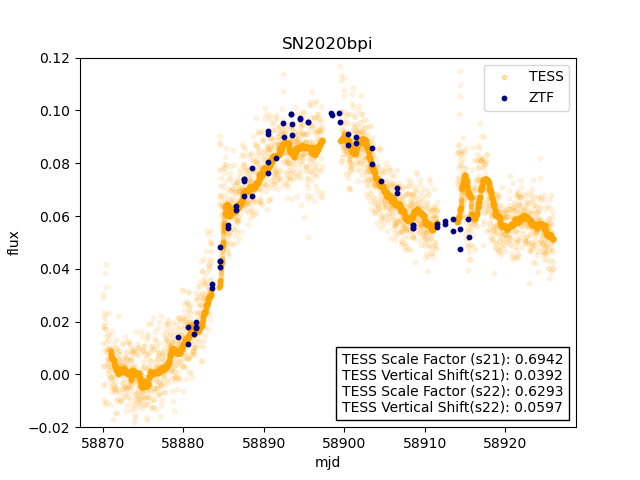

Text(0.5, 1.0, 'SN2020bpi')

In [85]:
# ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
#                         kind='scatter',s=0)

#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_scaled_2fit',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_ylim(-0.02,0.12)
ax.scatter(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_scaled_2fit'].rolling(96).median(),
           color='orange',alpha=0.3,s=10,label='TESS')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
                        kind='scatter',s=10,label='ZTF',ax=ax)
plt.legend()
anchText_2fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21): '+
                                                  np.str(np.around(fluxOptParams_s21.x[1],4))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[1],4))),loc=4)
ax.add_artist(anchText_2fit)
ax.set_title('SN2020bpi')
#plt.savefig('sn2020bpi_full_flux_scaled_2fit300.png',dpi=300)

<IPython.core.display.Javascript object>


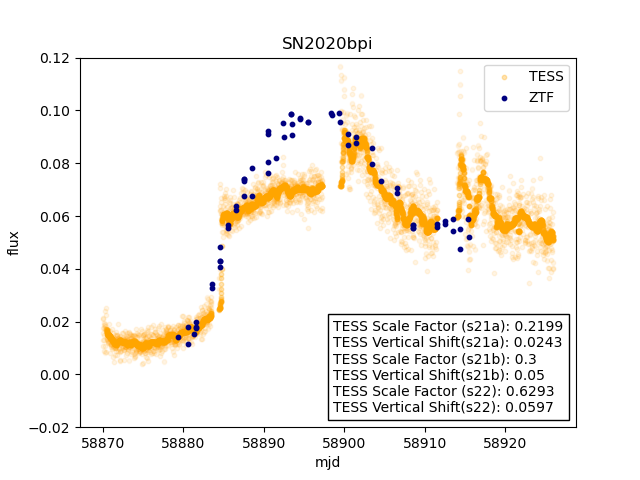

Text(0.5, 1.0, 'SN2020bpi')

In [86]:
# ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
#                         kind='scatter',s=0)

#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_scaled_3fit',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_ylim(-0.02,0.12)
ax.scatter(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_scaled_3fit'].rolling(48).median(),
           color='orange',alpha=0.3,s=10,label='TESS')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
                        kind='scatter',s=10,label='ZTF',ax=ax)


plt.legend()
anchText_3fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21a): '+
                                                  np.str(np.around(fluxOptParams_s21a.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21a): '+
                                                  np.str(np.around(fluxOptParams_s21a.x[1],4))+
                                                  '\n'+'TESS Scale Factor (s21b): '+
                                                  np.str(np.around(fluxOptParams_s21b.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21b): '+
                                                  np.str(np.around(fluxOptParams_s21b.x[1],4))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_s22.x[1],4))),loc=4)
ax.add_artist(anchText_3fit)
ax.set_title('SN2020bpi')
#plt.savefig('sn2020bpi_full_flux_scaled_2fit300.png',dpi=300)

<IPython.core.display.Javascript object>


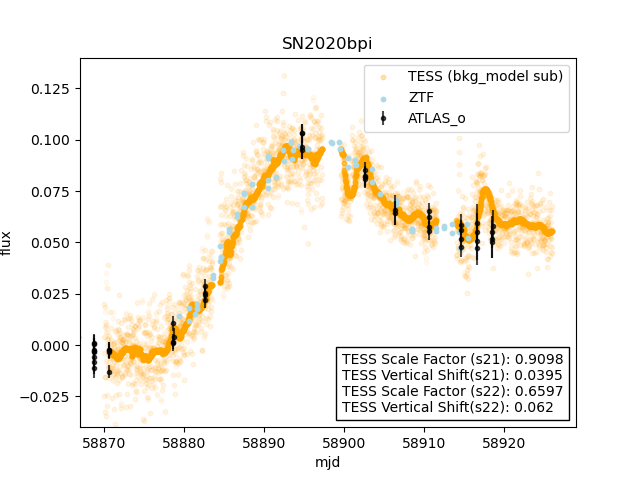

In [123]:
##BKG_MODEL SUBTRACTED VERSION

# ax = sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='navy',  
#                         kind='scatter',s=0)

#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_bkg_model_sub_scaled_2fit',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_xlim(sn2020bpi_s21s22.mjd.min()-3,sn2020bpi_s21s22.mjd.max()+3)
ax.set_ylim(-0.04,0.14)
ax.scatter(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_bkg_model_sub_scaled_2fit'].rolling(96).median(),
           color='orange',alpha=0.3,s=10,label='TESS (bkg_model sub)')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='lightblue',  
                        kind='scatter',s=10,label='ZTF',ax=ax)
ax.errorbar(atlas_o.MJD,atlas_o.FLUXCAL * 1.3e-5,yerr=atlas_o.FLUXCALERR * 1.3e-5, 
            fmt='.k',color='purple',alpha=0.7,label='ATLAS_o')

# sn2020bpi_s21s22.plot(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_scaled_2fit'].rolling(96).median(),
#            color='purple',alpha=0.3,s=10,label='TESS (bkg_model sub)',ax=ax)
plt.legend(loc=1)
anchText_2fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21): '+
                                                  np.str(np.around(fluxOptParams_bkg_s21.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21): '+
                                                  np.str(np.around(fluxOptParams_bkg_s21.x[1],4))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_bkg_s22.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_bkg_s22.x[1],4))),loc=4)
ax.add_artist(anchText_2fit)
ax.set_title('SN2020bpi')
#plt.savefig('sn2020bpi_full_flux_scaled_2fit300.png',dpi=300)

In [91]:
# def fourierFreqEst(data):
#     sampRate = 1/data['mjd'].diff.median()
#     data_f = fft.fft(data['bkg'].to_numpy())
#     zerosInd = np.argwhere( (data_f[1:] >= 0) & (data_f[:-1] <= 0) )

In [96]:
def sn2020bpi_flux_scale_bkg_add(params, fluxType, timeMin=0,timeMax=0):
    if timeMin !=0 and timeMax !=0:
        return (sn2020bpi_ztf_r[(sn2020bpi_ztf_r.BTJD > timeMin) & (sn2020bpi_ztf_r.BTJD <timeMax)][np.str('flux')] - 
                (params[0]*sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD > timeMin) & 
                                                         (sn2020bpi_ztf_r.BTJD <timeMax)][np.str(fluxType)] + params[1]
            -params[2]*sn2020bpi_s21s22_interpolated[(sn2020bpi_ztf_r.BTJD > timeMin) & 
                                                         (sn2020bpi_ztf_r.BTJD <timeMax)]['bkg_model_flux']))
    elif timeMin ==0 and timeMax ==0:
        return ((sn2020bpi_ztf_r[np.str('flux')]) - 
                (params[0]*sn2020bpi_s21s22_interpolated[np.str(fluxType)]+ params[1]
                -params[2]*sn2020bpi_s21s22_interpolated['bkg_model_flux']))

In [97]:
fluxOptParams_s21_bkgScale = optimize.least_squares(sn2020bpi_flux_scale_bkg_add, x0=[0.3,.03,.05],
                                       args=('flux',
                                             sn2020bpi_s21s22['BTJD'].min(),
                                             sn2020bpi_s22_fixed['BTJD'].min()))
fluxOptParams_s22_bkgScale = optimize.least_squares(sn2020bpi_flux_scale_bkg_add, x0=[0.3,.03,.05],
                                       args=('flux',
                                             sn2020bpi_s22_fixed['BTJD'].min(),
                                             1912))

In [98]:
fluxOptParams_s21_bkgScale.x, fluxOptParams_s22_bkgScale.x

(array([0.93806506, 0.0403808 , 1.10781727]),
 array([ 0.5521169 ,  0.05932651, -0.42134076]))

In [99]:
s21_bkg_frac_flux =pd.Series(fluxOptParams_s21_bkgScale.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1900]['flux']+
                                        fluxOptParams_s21_bkgScale.x[1]-
                                     fluxOptParams_s21_bkgScale.x[2]*sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD<1900]['bkg_model_flux'])
s22_bkg_frac_flux =pd.Series(fluxOptParams_s22_bkgScale.x[0]*
                                        sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD>1900]['flux']+
                                        fluxOptParams_s22_bkgScale.x[1]-
                                     fluxOptParams_s22_bkgScale.x[2]*sn2020bpi_s21s22[sn2020bpi_s21s22.BTJD>1900]['bkg_model_flux'])
sn2020bpi_s21s22['flux_bkg_model_frac_2fit'] = pd.concat([s21_bkg_frac_flux,s22_bkg_frac_flux])
# sn2020bpi_s21s22['flux_bkg_model_frac_2fit']

<IPython.core.display.Javascript object>


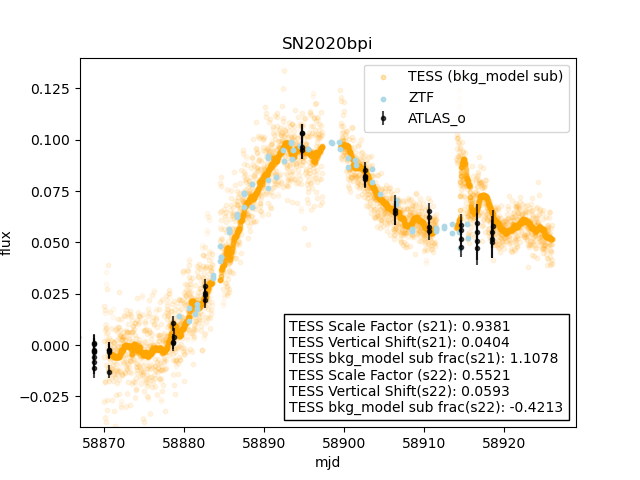

In [112]:
##BKG_MODEL SCALE OPTIMIZATION VERSION

# fig,ax = plt.subplots(1,1)

#sn2020bpi_s21s22['temp'] = 2* sn2020bpi_s21s22['flux'] +.06

# ax.scatter(sn2020bpi_s21s22['mjd'],)
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_bkg_model_frac_2fit',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_xlim(sn2020bpi_s21s22.mjd.min()-3,sn2020bpi_s21s22.mjd.max()+3)
ax.set_ylim(-0.04,0.14)
ax.scatter(sn2020bpi_s21s22['mjd'][0::2], sn2020bpi_s21s22['flux_bkg_model_frac_2fit'][0::2].rolling(48).median(),
           color='orange',alpha=0.3,s=10,label='TESS (bkg_model sub)')

ax.errorbar(atlas_o.MJD,atlas_o.FLUXCAL * 1.3e-5,yerr=atlas_o.FLUXCALERR * 1.3e-5, 
            fmt='.k',color='purple',alpha=0.7,label='ATLAS_o')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='lightblue',  
                        kind='scatter',s=10,label='ZTF',ax=ax)

# sn2020bpi_s21s22.plot(sn2020bpi_s21s22['mjd'], sn2020bpi_s21s22['flux_scaled_2fit'].rolling(96).median(),
#            color='purple',alpha=0.3,s=10,label='TESS (bkg_model sub)',ax=ax)
plt.legend(loc=1)
anchText_2fit = mpl.offsetbox.AnchoredText(np.str('TESS Scale Factor (s21): '+
                                                  np.str(np.around(fluxOptParams_s21_bkgScale.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s21): '+
                                                  np.str(np.around(fluxOptParams_s21_bkgScale.x[1],4))+
                                                  '\n'+'TESS bkg_model sub frac(s21): '+
                                                  np.str(np.around(fluxOptParams_s21_bkgScale.x[2],4))+
                                                  '\n'+'TESS Scale Factor (s22): '+
                                                  np.str(np.around(fluxOptParams_s22_bkgScale.x[0],4))+
                                                  '\n'+'TESS Vertical Shift(s22): '+
                                                  np.str(np.around(fluxOptParams_s22_bkgScale.x[1],4))+
                                                 '\n'+'TESS bkg_model sub frac(s22): '+
                                                  np.str(np.around(fluxOptParams_s22_bkgScale.x[2],4))),
                                           loc=4)
ax.add_artist(anchText_2fit)
ax.set_title('SN2020bpi')
#plt.savefig('sn2020bpi_frac_flux_scaled_2fit300.png',dpi=300)

<IPython.core.display.Javascript object>


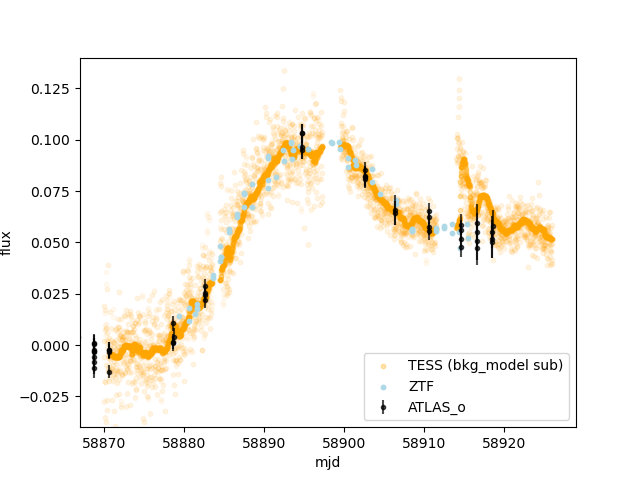

In [101]:
ax = sn2020bpi_s21s22.plot(x='mjd',y='flux_bkg_model_frac_2fit',  
                        color='orange',alpha=0.05,kind='scatter',s=10)
ax.set_xlim(sn2020bpi_s21s22.mjd.min()-3,sn2020bpi_s21s22.mjd.max()+3)
ax.set_ylim(-0.04,0.14)
ax.scatter(sn2020bpi_s21s22['mjd'][0::2], sn2020bpi_s21s22['flux_bkg_model_frac_2fit'][0::2].rolling(48).median(),
           color='orange',alpha=0.3,s=10,label='TESS (bkg_model sub)')
sn2020bpi_ztf_r.plot(x='mjd',y='flux',color='lightblue',  
                        kind='scatter',s=10,label='ZTF',ax=ax)

ax.errorbar(atlas_o.MJD,atlas_o.FLUXCAL * 1.3e-5,yerr=atlas_o.FLUXCALERR * 1.3e-5, 
            fmt='.k',color='purple',alpha=0.7,label='ATLAS_o')
ax.legend()

Note: scaling to bkg_model subtraction that is causing increase in spike at ~58915 are due to fitting from only the first cycle of s22

In [102]:
## Some Fourier stuff with the background
# ax = sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0].plot(x='mjd',y='bkg',  
#                         color='orange',alpha=0.1,kind='scatter',s=10)
# #ax.set_yscale('symlog',linthreshy=100)
# ax.scatter(sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['mjd'], 
#            sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['bkg'].rolling(24).median(),
#            color='orange',alpha=0.5,s=10)
# fig.show();

# from scipy import fft, arange, signal
# def sine(x,a,w, phi):
#     return a * np.sin(w*x+phi)

# def sinePen(params):
#     return (fft.fft(sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['bkg'].to_numpy()) -
#            sine(sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['mjd'], params[0],params[1],params[2]))

# sn2020bpi_tess_bkg_f_ls = optimize.least_squares(sinePen, x0=[0.25e6,7,58870])
# # sn2020bpi_tess_bkg_f_ls

# sn2020bpi_tess_bkg_fourier = fft.fft(sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['bkg'].to_numpy())

# sn2020bpi_tess_bkg_f_params, sn2020bpi_tess_bkg_f_cov= optimize.curve_fit(sine,
#                                               (sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['mjd']-
#                                                sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['mjd'].min()),
#                                               sn2020bpi_tess_bkg_fourier)
# sn2020bpi_tess_bkg_f_sinfit = sine((sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['mjd']-
#                                     sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['mjd'].min()),
#                                    sn2020bpi_tess_bkg_f_params[0],
#                                    sn2020bpi_tess_bkg_f_params[1],
#                                    sn2020bpi_tess_bkg_f_params[2]
#                                   )
# sn2020bpi_tess_bkg_f_params
# sn2020bpi_tess_bkg_f_lsfit = sine(sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['mjd'], 
#                                   sn2020bpi_tess_bkg_f_ls.x[0],
#                                   sn2020bpi_tess_bkg_f_ls.x[1],
#                                   sn2020bpi_tess_bkg_f_ls.x[2])

# fig, ax = plt.subplots()
# ax.scatter(sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['mjd'],
#             sn2020bpi_tess_bkg_fourier,
#           color='navy',alpha=0.5,s=10)


# ax.plot(sn2020bpi_s21s22[sn2020bpi_s21s22.index % 2 !=0]['mjd'], sn2020bpi_tess_bkg_f_lsfit)
# #ax.set_yscale('symlog')#,linthreshy=10000)
# #ax.set_xlim(58898)
# ax.set_ylim(-0.1e7,0.1e7)
# fig.show();

$$
f(x) = a \left( x-b \right)^2
$$

<IPython.core.display.Javascript object>


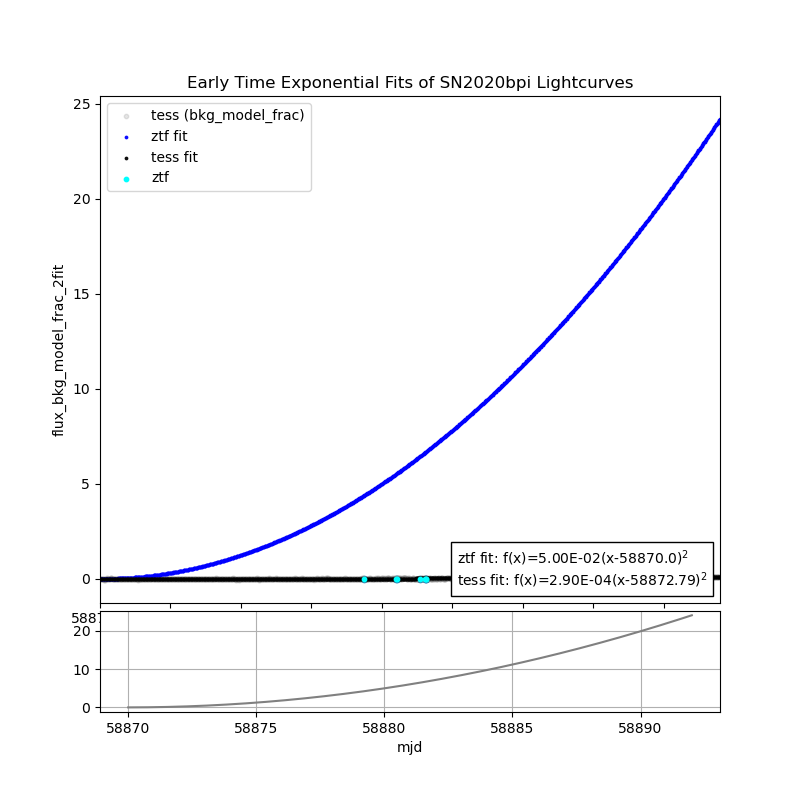

Text(0.5, 0, 'mjd')

In [103]:
fitSampReg = [ 58870,58892]
def riseFitPenalty(params, lightcurve,fluxtype):
    return(lightcurve[np.str(fluxtype)] - (params[0]*(lightcurve['mjd']-params[1])**2))

ztf_riseFitParams = optimize.least_squares(riseFitPenalty, 
                                           x0=[0.05,fitSampReg[0]],
                                           args=[sn2020bpi_ztf_r[(sn2020bpi_ztf_r.mjd > fitSampReg[0]) & 
                                                                 (sn2020bpi_ztf_r.mjd < fitSampReg[1])],
                                                'flux'])
tess_riseFitParams = optimize.least_squares(riseFitPenalty, 
                                           x0=[0.05,fitSampReg[0]],
                                           args=[sn2020bpi_s21s22[(sn2020bpi_s21s22.mjd > fitSampReg[0]) & 
                                                                 (sn2020bpi_s21s22.mjd < fitSampReg[1])],
                                                'flux_bkg_model_frac_2fit'])

fitSampLinSpace = np.linspace(fitSampReg[0],fitSampReg[1],
                              sn2020bpi_s21s22_even[(sn2020bpi_s21s22_even.mjd > fitSampReg[0]) & 
                                                                 (sn2020bpi_s21s22_even.mjd < fitSampReg[1])]['mjd'].size)
ztf_riseFitVals = ztf_riseFitParams.x[0] * (fitSampLinSpace- ztf_riseFitParams.x[1])**2
tess_riseFitVals =  tess_riseFitParams.x[0] * (fitSampLinSpace- tess_riseFitParams.x[1])**2



ax = sn2020bpi_ztf_r[(sn2020bpi_ztf_r.mjd > fitSampReg[0]) & 
                     (sn2020bpi_ztf_r.mjd < fitSampReg[1])].plot('mjd','flux',kind='scatter',figsize=(8,8))

sn2020bpi_s21s22.plot(x='mjd',y='flux_bkg_model_frac_2fit',  
                        color='grey',alpha=0.2,kind='scatter',s=10,label='tess (bkg_model_frac)',ax=ax)
ax.scatter(fitSampLinSpace, ztf_riseFitVals,color='blue',s=3,alpha=0.9,label='ztf fit')
ax.scatter(fitSampLinSpace, tess_riseFitVals,color='black',s=3,alpha=0.9,label='tess fit')



# sn2020bpi_ztf_r[(sn2020bpi_ztf_r.mjd > fitSampReg[0]) & 
#                      (sn2020bpi_ztf_r.mjd < fitSampReg[1])].plot('mjd','flux', kind='scatter',color='navy',label='ztf',ax=ax)
ax.scatter(sn2020bpi_ztf_r.mjd, sn2020bpi_ztf_r.flux,s=10, color='cyan',label='ztf')
ax.legend()
ztf_riseFitParams.x, tess_riseFitParams.x

anchText = mpl.offsetbox.AnchoredText(np.str('ztf fit: '+
                                                  'f(x)='+np.str("{:.2E}".format(ztf_riseFitParams.x[0]))+'(x-'+
                                                  np.str(np.around(ztf_riseFitParams.x[1],2))+r'$)^2$'+
                                                  '\n'+'tess fit: '+
                                             'f(x)='+np.str("{:.2E}".format(tess_riseFitParams.x[0]))+'(x-'+
                                                  np.str(np.around(tess_riseFitParams.x[1],2))+r'$)^2$'),
                                           loc=4)
ax.add_artist(anchText)
ax.set_xlim(fitSampReg[0],fitSampReg[1])
#ax.grid()
ax.set_title('Early Time Exponential Fits of SN2020bpi Lightcurves')


## Diff b/w curve fits
divider = make_axes_locatable(ax)

ax2 = divider.append_axes("bottom",size="20%",pad=0.08)
ax.figure.add_axes(ax2)
ax2.plot(fitSampLinSpace,
        ztf_riseFitVals-tess_riseFitVals,color='grey')
ax2.grid()
plt.xlabel("mjd") 


In [104]:
# sn2020bpi_s21s22

In [105]:
s21s22_Jha = pd.DataFrame()
s21s22_Jha['BTJD'] = sn2020bpi_s21s22['BTJD']
s21s22_Jha['mjd'] = sn2020bpi_s21s22['mjd']
s21s22_Jha['cts'] = sn2020bpi_s21s22['cts']
s21s22_Jha['e_cts'] = sn2020bpi_s21s22['e_cts']
s21s22_Jha['bkg_model'] = sn2020bpi_s21s22['bkg_model']
s21s22_Jha['raw_flux'] = sn2020bpi_s21s22['flux']
s21s22_Jha['e_flux'] = sn2020bpi_s21s22['flux_error']
s21s22_Jha['bkg_model_flux'] = sn2020bpi_s21s22['bkg_model_flux']
s21s22_Jha['corr_flux'] = sn2020bpi_s21s22['flux_bkg_model_frac_2fit']
# s21s22_Jha.to_csv('./JhaData/TESS_SN2020bpi.csv',index=False)

In [106]:
# sn2020bpi_ztf_r

In [107]:
ztf_Jha = pd.DataFrame()
ztf_Jha['BTJD'] = sn2020bpi_ztf_r['BTJD']
ztf_Jha['mjd'] = sn2020bpi_ztf_r['mjd']
ztf_Jha['magap'] = sn2020bpi_ztf_r['magap']
ztf_Jha['sig_magap'] = sn2020bpi_ztf_r['sigmagap']
#ztf_Jha['sig_magap_corr'] = sn2020bpi_ztf_r['sigmagap_corr']
ztf_Jha['flux'] = sn2020bpi_ztf_r['flux']
#ztf_Jha['sig_flux'] = sn2020bpi_ztf_r['sig_flux']
# ztf_Jha.to_csv('./JhaData/ztf_SN2020bpi.csv',index=False)